## 1. Predictions of Infosys Stock Data

The 2017-2018 data is taken and trained and this model is used to predict the stock of price of the first day of 2019. From then on the current day price is fed into the model to predict the next day price.

In [1]:
#importing required libraries
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
import math
from sklearn.metrics import mean_squared_error
%matplotlib inline

Using TensorFlow backend.


In [2]:
dataset = pd.read_csv('INFY.NS.csv')
dataset = dataset.drop(dataset.index[0])#index is dropped
dataset.tail()

,Date,Open,High,Low,Close,Adj Close,Volume
489,2018-12-24,657.000000,658.799988,647.599976,649.000000,625.419800,8379825
490,2018-12-26,647.000000,647.000000,637.349976,644.049988,620.649658,6178552
491,2018-12-27,652.750000,663.250000,649.000000,656.799988,632.936340,15333902
492,2018-12-28,663.349976,663.500000,653.299988,656.950012,633.080933,4736598
493,2018-12-31,660.000000,662.000000,655.799988,658.950012,635.008240,3373319


NOTE: number of days is 493 and not 365*2 as Saturday and Sundays stock price is not calculated.

In [3]:
dataset.shape

(493, 7)

In [4]:
#Close Data
dataset.iloc[:,4]

1      496.924988
2      498.875000
3      498.075012
4      486.125000
5      485.174988
          ...    
489    649.000000
490    644.049988
491    656.799988
492    656.950012
493    658.950012
Name: Close, Length: 493, dtype: float64

In [5]:
# defining the input as data and output(1 day lag of input) as target
lag=1
data = dataset.iloc[:493-lag,4]
target = dataset.iloc[lag:493+lag,4]
print(data.head())
print(target.head())

1    496.924988
2    498.875000
3    498.075012
4    486.125000
5    485.174988
Name: Close, dtype: float64
2    498.875000
3    498.075012
4    486.125000
5    485.174988
6    485.274994
Name: Close, dtype: float64


In [6]:
#shape of the data
print(data.shape)
print(target.shape)

(492,)
(492,)


In [7]:
#convert input in numpy array and normalizing it
data=data.values.reshape(493-lag,1)
data = data.astype('float32')
scaler = MinMaxScaler(feature_range=(0, 1))
data_n = scaler.fit_transform(data)#normalized data
print(data_n[:10])

[[0.19430542]
 [0.20059681]
 [0.19801581]
 [0.15946114]
 [0.15639603]
 [0.15671873]
 [0.1543796 ]
 [0.20430708]
 [0.16518784]
 [0.13268268]]


In [8]:
#convert target in numpy array and normalizing it
target =target.values
target_n = scaler.fit_transform(target.reshape(-1,1))#normalized
print(target_n[:10])

[[0.20059682]
 [0.1980158 ]
 [0.15946116]
 [0.15639611]
 [0.15671876]
 [0.15437966]
 [0.20430708]
 [0.16518787]
 [0.13268269]
 [0.13227939]]


In [9]:
#converting the shape in the way machine will take for training
data_n = np.reshape(data_n,(data_n.shape[0],1,data_n.shape[1]))
print(data_n[:5])

[[[0.19430542]]

 [[0.20059681]]

 [[0.19801581]]

 [[0.15946114]]

 [[0.15639603]]]


In [10]:
#Defining LSTM Model
model = Sequential()
model.add(LSTM(128, input_shape=(1,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='sgd')

In [11]:
#data is trained here
model.fit(data_n, target_n, epochs=50, batch_size=1, verbose=1)

Epoch 1/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0813
Epoch 2/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0556
Epoch 3/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0416
Epoch 4/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0293
Epoch 5/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0196
Epoch 6/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0122
Epoch 7/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0074
Epoch 8/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0043
Epoch 9/50
492/492 [==============================] - 2s 3ms/step - loss: 0.0026
Epoch 10/50
492/492 [==============================] - 2s 4ms/step - loss: 0.0017
Epoch 11/50
492/492 [==============================] - 2s 5ms/step - loss: 0.0012
Epoch 12/50
492/492 [==============================] - 2s 4ms/step - loss: 9.7958e-04
Epoch 13/50
492/492 [

In [12]:
#prediction on the original data (training data)
Predict_n = model.predict(data_n)
Predict = scaler.inverse_transform(Predict_n)
testScore = math.sqrt(mean_squared_error(target, Predict))
print('Test Score: %.2f RMSE' % (testScore))

Test Score: 8.52 RMSE


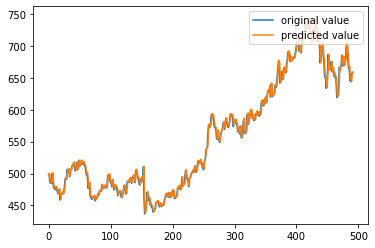

In [13]:
#plot of 
plt.plot(target)
plt.plot(Predict)
plt.legend(['original value','predicted value'],loc='upper right')
plt.show()

In [14]:
#checking a random value
print(target[1])
print(Predict[1])

498.075012
[500.04364]


In [15]:
#new data
test_data = pd.read_csv("Jan_data.csv")
test_data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2019-01-01,660.950012,666.299988,654.150024,665.049988,640.886658,2943390
1,2019-01-02,666.000000,674.000000,662.049988,669.049988,644.741272,7416655
2,2019-01-03,672.000000,677.000000,663.099976,669.150024,644.837646,6827249
3,2019-01-04,671.750000,673.900024,651.000000,661.049988,637.031982,7889310
4,2019-01-07,665.000000,673.599976,661.500000,671.700012,647.295044,8046340


In [16]:
t_data = test_data.iloc[0:20,4]
t_data=t_data.values.reshape(20,1)
t_data[:5]

array([[665.049988],
       [669.049988],
       [669.150024],
       [661.049988],
       [671.700012]])

In [17]:
dec_31 = Predict_n[-1]
print(dec_31)
print('dec_31:', Predict[-1])
pred_data =[]
for i in range(20):
    if i==0:
        a=dec_31
        print('a:',a)
        
    else:
        a = b
        
    b = model.predict(a.reshape(1,1,1))
    c = scaler.inverse_transform(b)
    #print('c:',c)
    pred_data.append(c)


[0.71363366]
dec_31: [657.89075]
a: [0.71363366]


In [18]:
pred_data = np.asarray(pred_data).reshape(20,1)
pred_data

array([[658.8225 ],
       [659.74536],
       [660.65906],
       [661.56354],
       [662.4589 ],
       [663.3449 ],
       [664.2217 ],
       [665.089  ],
       [665.94696],
       [666.7955 ],
       [667.6344 ],
       [668.4639 ],
       [669.2838 ],
       [670.0941 ],
       [670.89484],
       [671.68604],
       [672.4675 ],
       [673.23956],
       [674.0019 ],
       [674.7545 ]], dtype=float32)

## 1. Plot of the actual closing stock price from Jan. 1, 2019 to Jan.31, 2019 to the values predicted

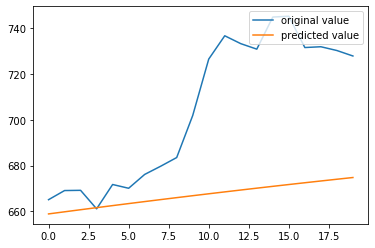

In [19]:

plt.plot(t_data)
plt.plot(pred_data)
plt.legend(['original value','predicted value'],loc='upper right')
plt.show()

## 2. Comments on the predictions

The original data seemed like an increasing function, hence predictions are also increasing. A positive slope is observed.

It has never seen the test data i.e data of 2019 is completely new. Predictions are made on data that has never been seen while training. 

## 3. Improving the predictions

The number of units in LSTM cell can be increased.
The lag can be increased. (currently lag is 1 day)